In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Checking if we are in the right directory to read the data
#If not set the working directory 
os.getcwd()
#os.chdir('/home/venitha_b/Projects/2019-test-ppq-pk/plots/AL/pkpd_AL/pfcrt.K76')

'/home/venitha_b/Projects/2019-test-ppq-pk/plots/AL/pkpd_AL/pfcrt.K76'

In [61]:
#Loading pmax and efficacy data
#os.listdir()
data = pd.read_csv('pkpd_AL_pfcrt.k76_pmax_art_adj_50k_efficacy_sigmoid.csv')
data.head()

,pmax_art,efficacy
0,0.999800,99.979
1,0.999789,99.978
2,0.999778,99.977
3,0.999767,99.976
4,0.998889,99.975


In [ ]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)



xdata = np.array(data['pmax_art'])
ydata = np.array(data['efficacy'])

L = np.max(ydata) # this is the maximum value that y can take, here its 100
x0 = np.median(xdata) # Midpoint of the curve, horizontal shift
k = 5 #Determines the steepness of the curve
b = 0 #Determines vertical shift of the curve, making the axes [b, L+b]
p0 = [L, x0,k,b] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, maxfev=10000)
fitted_values = sigmoid(xdata, *popt) #Store the fitted values


In [63]:
print("L:", popt[0], "x0:", popt[1], "k:", popt[2], "b:", popt[3])

L: 14.43983368335566 x0: 0.9838815446848762 k: 50.84215126616647 b: 90.29673768935841


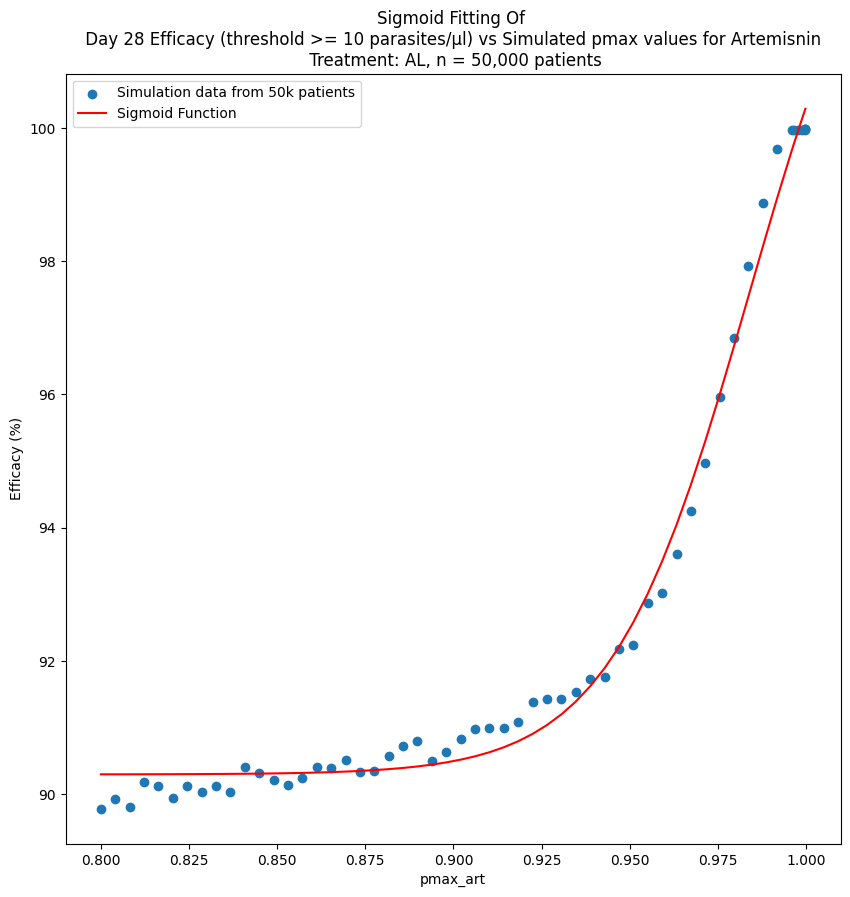

In [64]:
plt.figure(figsize=(10, 10))
plt.scatter(xdata, ydata, label='Simulation data from 50k patients')
plt.plot(xdata, fitted_values, label='Sigmoid Function', color='red')
plt.title("Sigmoid Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.ylabel('Efficacy (%)')
plt.xlabel('pmax_art')
plt.legend()
plt.savefig('pkpd_AL_pfcrt.K76_50k_sigmoid.png', dpi = 300)
plt.show()

In [74]:
def my_cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def my_quartic(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def my_quintic(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

test_opt, test_cov = curve_fit(my_cubic, xdata, ydata)
test_fitted_values = my_cubic(xdata, *test_opt)

In [70]:
print("a:", test_opt[0], "b:", test_opt[1], "c:", test_opt[2], "d:", test_opt[3])

a: 4175.794853514944 b: -10828.016376711212 c: 9356.350138121155 d: -2603.684595461477


In [76]:
test_opt02, test_cov02 = curve_fit(my_quartic, xdata, ydata)
test_fitted_values02 = my_quartic(xdata, *test_opt02)
print("a:", test_opt02[0], "b:", test_opt02[1], "c:", test_opt02[2], "d:", test_opt02[3], "e:", test_opt02[4])

a: 12306.466833898825 b: -40268.80600925814 c: 49246.60379729404 d: -26662.653628928132 e: 5478.944645493757


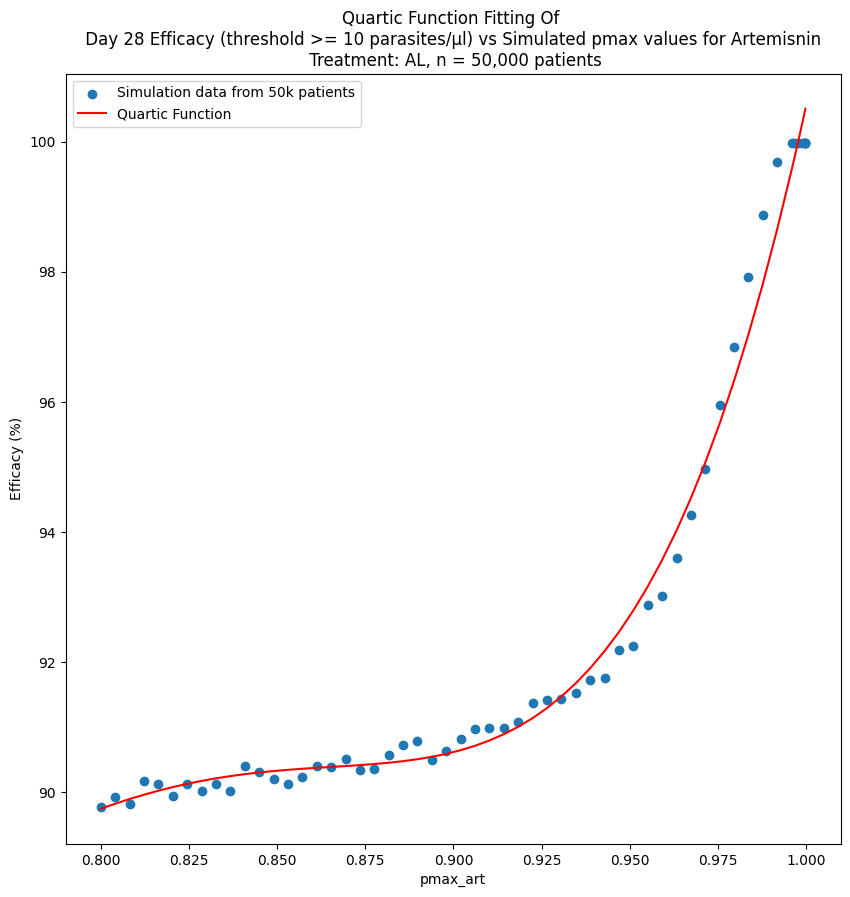

In [80]:
plt.figure(figsize=(10, 10))
plt.scatter(xdata, ydata, label='Simulation data from 50k patients')
plt.plot(xdata, test_fitted_values02, label='Quartic Function', color='red')
plt.title("Quartic Function Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.ylabel('Efficacy (%)')
plt.xlabel('pmax_art')
plt.legend()
plt.savefig('pkpd_AL_pfcrt.K76_50k_quartic.png', dpi = 300)
plt.show()

In [78]:
test_opt03, test_cov03 = curve_fit(my_quintic, xdata, ydata)
test_fitted_values03 = my_quintic(xdata, *test_opt03)
print("a:", test_opt03[0], "b:", test_opt03[1], "c:", test_opt03[2], "d:", test_opt03[3], "e:", test_opt03[4], "f:", test_opt03[5])

a: -343689.1819899223 b: 1561940.710016599 c: -2830952.9997102777 d: 2558345.831535268 e: -1152949.219764686 f: 207405.2689033526


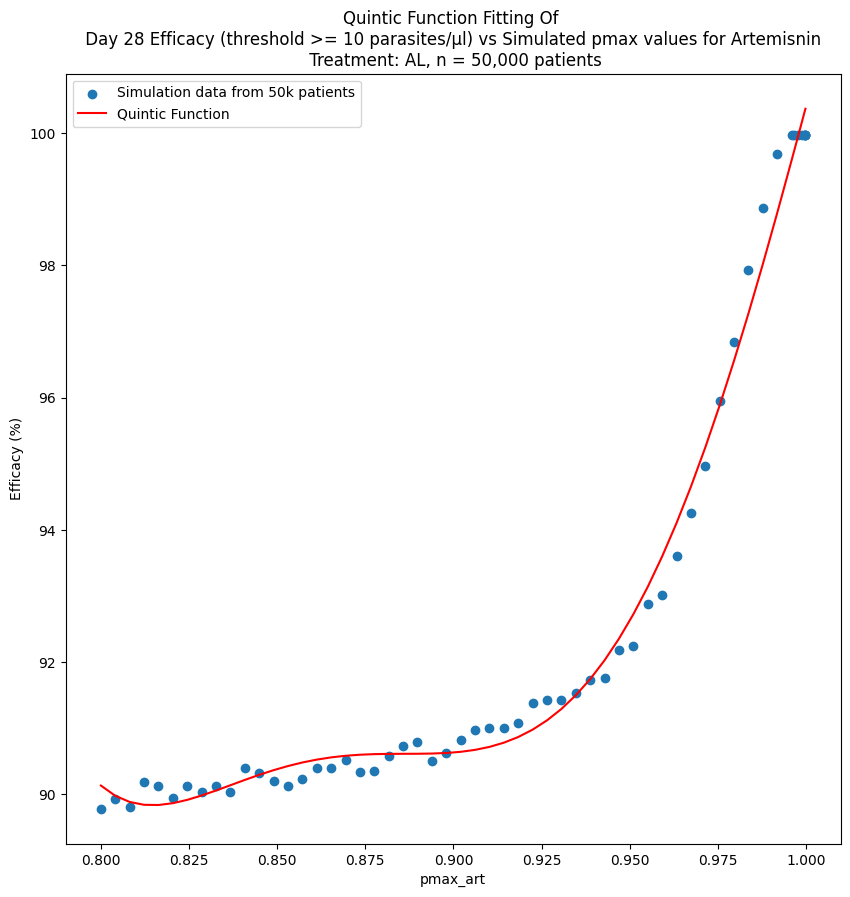

In [79]:
plt.figure(figsize=(10, 10))
plt.scatter(xdata, ydata, label='Simulation data from 50k patients')
plt.plot(xdata, test_fitted_values03, label='Quintic Function', color='red')
plt.title("Quintic Function Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.ylabel('Efficacy (%)')
plt.xlabel('pmax_art')
plt.legend()
plt.savefig('pkpd_AL_pfcrt.K76_50k_cubic.png', dpi = 300)
plt.show()

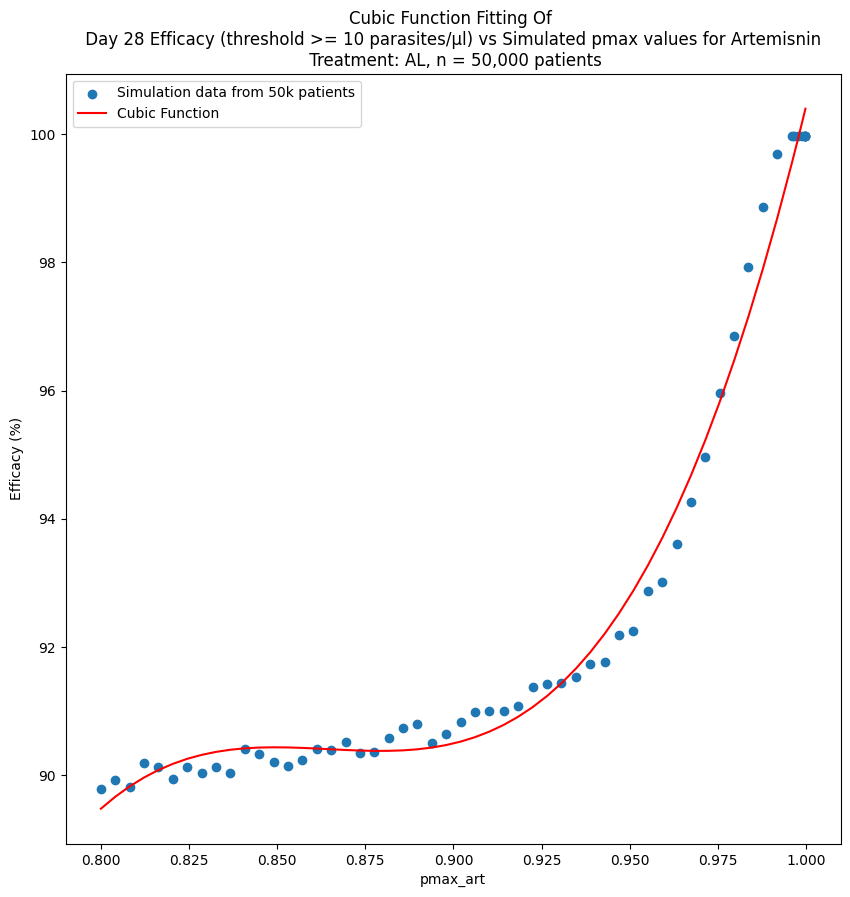

In [72]:
plt.figure(figsize=(10, 10))
plt.scatter(xdata, ydata, label='Simulation data from 50k patients')
plt.plot(xdata, test_fitted_values, label='Cubic Function', color='red')
plt.title("Cubic Function Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.ylabel('Efficacy (%)')
plt.xlabel('pmax_art')
plt.legend()
plt.savefig('pkpd_AL_pfcrt.K76_50k_cubic.png', dpi = 300)
plt.show()

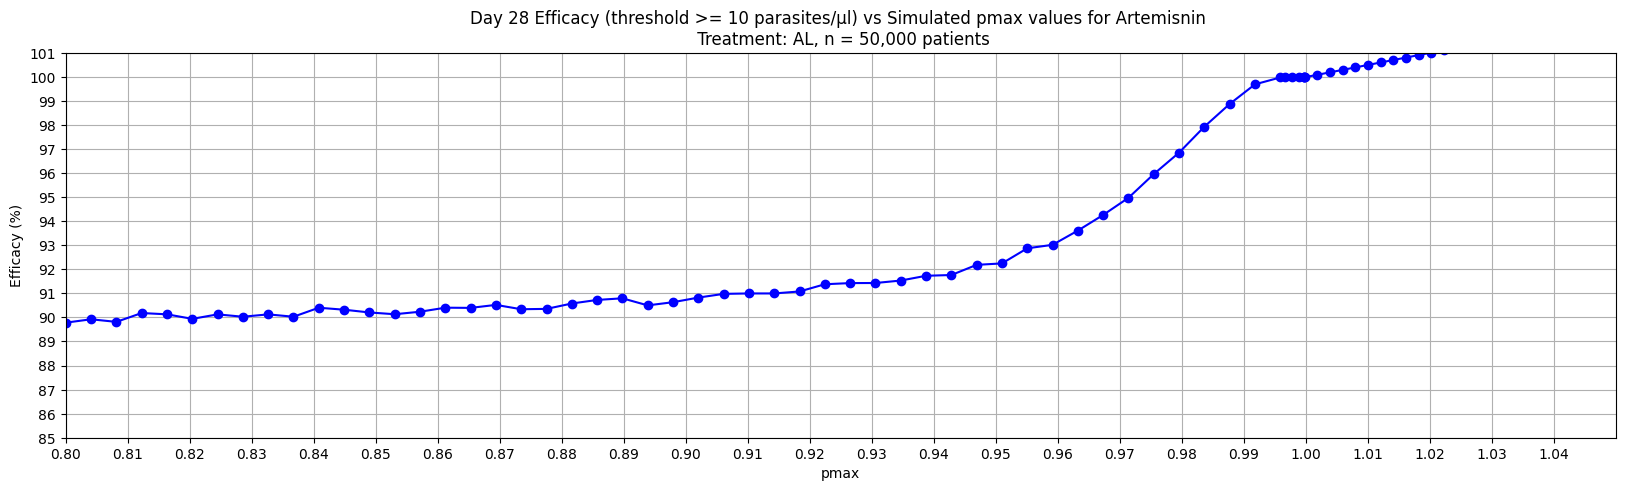

In [51]:
plt.figure(figsize=(20, 5))
plt.plot(xdata, ydata, marker='o', linestyle='-', color='b')
plt.xlabel('pmax')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.grid(True)
plt.xticks(np.arange(min(xdata), max(xdata), 0.01))  # Adjust tick marks if necessary
plt.xlim(min(xdata), 1.05)  
plt.yticks(np.arange(85, 105, 1))  # Y-axis ticks from 0 to 100%
plt.ylim(85, 101) 
plt.show()

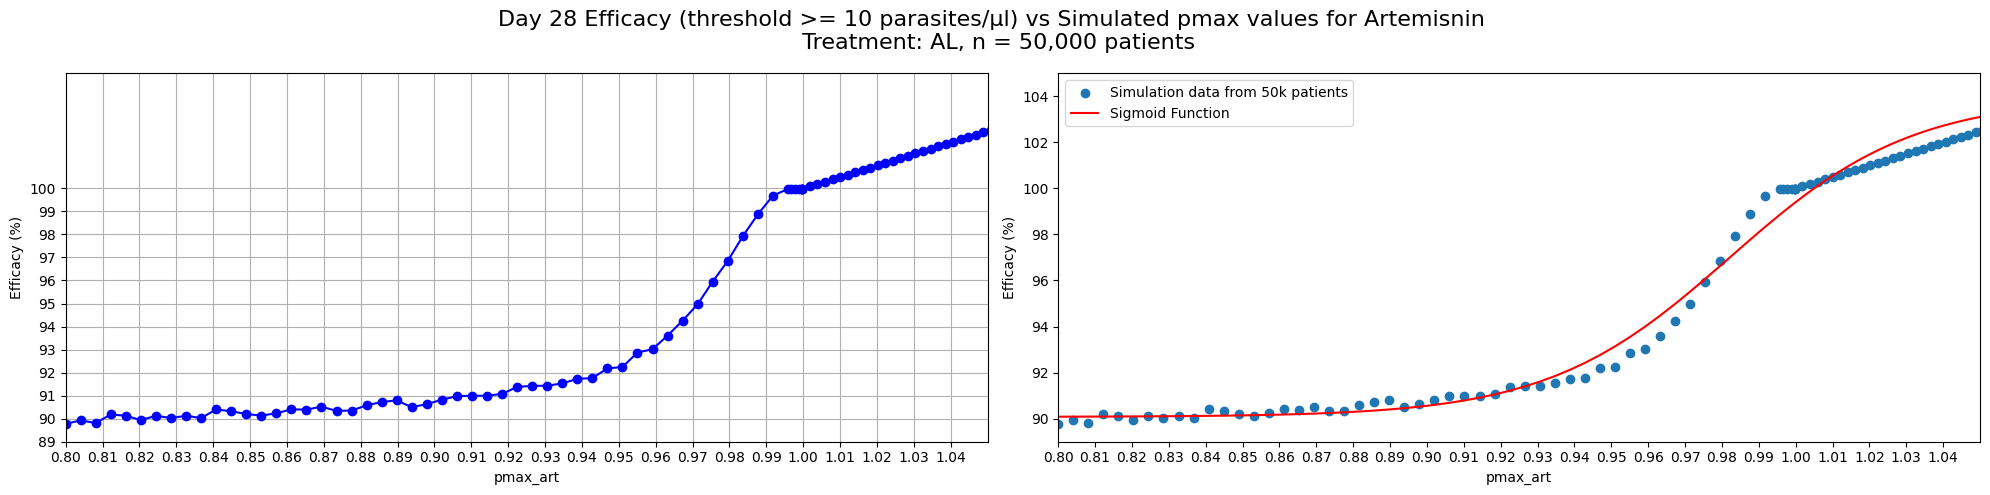

In [53]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

ax1 = axes[0]
ax1.plot(xdata, ydata, marker='o', linestyle='-', color='b')
ax1.set_xlabel('pmax_art')
ax1.set_ylabel('Efficacy (%)')
#ax1.set_title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
ax1.grid(True)
ax1.set_xticks(np.arange(min(xdata), max(xdata), 0.01))  # Adjust tick marks if necessary
ax1.set_xlim(min(xdata), 1.05)
ax1.set_yticks(np.arange(85, 101, 1))  # Y-axis ticks from 0 to 100%
ax1.set_ylim(89, 105) 


ax2 = axes[1] 
ax2.scatter(xdata, ydata, label='Simulation data from 50k patients')
ax2.plot(xdata, fitted_values, label='Sigmoid Function', color='red')
#ax2.set_title("Sigmoid Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
ax2.set_xticks(np.arange(min(xdata), max(xdata), 0.01))  # Adjust tick marks if necessary
ax2.set_xlim(min(xdata), 1.05)
ax2.set_ylim(89, 105) 
ax2.set_ylabel('Efficacy (%)')
ax2.set_xlabel('pmax_art')
ax2.legend()

fig.suptitle("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients", fontsize=16)
plt.tight_layout() 
#plt.savefig('pkpd_AL_pfcrt.K76_50k_sigmoid.png', dpi = 300)
plt.show()

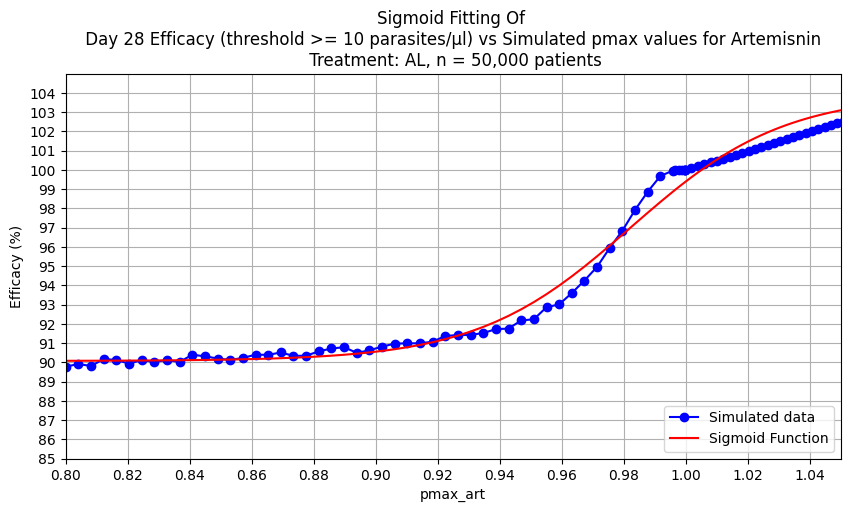

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(xdata, ydata, marker='o', linestyle='-', color='b', label = 'Simulated data')
plt.plot(xdata, fitted_values, label='Sigmoid Function', color='red')
plt.grid(True)
plt.xlabel('pmax_art')
plt.ylabel('Efficacy (%)')
plt.title("Sigmoid Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.xticks(np.arange(min(xdata), max(xdata), 0.02))  # Adjust tick marks if necessary
plt.xlim(min(xdata), 1.05)
plt.yticks(np.arange(85, 105, 1))  # Y-axis ticks from 0 to 100%
plt.ylim(85, 105) 

plt.legend(loc='lower right')
#plt.savefig('pkpd_AL_pfcrt.K76_50k_sigmoid.png', dpi = 300)
plt.show()

In [ ]:
L = max(ydata) # this is the maximum value that y can take, here its 100
x0 = 0.95 # Midpoint of the curve, horizontal shift
k = 1 #Determines the steepness of the curve
b = 90 #Determines vertical shift of the curve, making the axes [b, L+b]
p0 = [L, x0,k,b] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, maxfev=10000)
fitted_values = sigmoid(xdata, *popt) #Store the fitted values

print("L:", popt[0], "\nx0:", popt[1], "\nk:", popt[2], "\nb:", popt[3])

plt.figure(figsize=(10, 10))
plt.plot(xdata, ydata, marker='o', linestyle='-', color='b', label = 'Simulated data')
plt.plot(xdata, fitted_values, label='Sigmoid Function', color='red')
plt.grid(True)
plt.xlabel('pmax_art')
plt.ylabel('Efficacy (%)')
plt.title("Sigmoid Fitting Of \n Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Artemisnin \n Treatment: AL, n = 50,000 patients")
plt.xticks(np.arange(0.79, 1.01, 0.05))  # Adjust tick marks if necessary
plt.xlim(min(xdata), 1.01)
plt.yticks(np.arange(89, 105, 0.5))  # Y-axis ticks from 0 to 100%
plt.ylim(89, 101) 

plt.legend(loc='lower right')
#plt.savefig('pkpd_AL_pfcrt.K76_50k_sigmoid.png', dpi = 300)
plt.show()

In [43]:
values1 = np.linspace(0.9998, 1.1, 50)
values2 = np.linspace(99.979, 105, 50)

values1 = values1[::-1]
values2 = values2[::-1]

for v1, v2 in zip(values1, values2):
    print(f"{v1}, {v2}")

1.1, 105.0
1.0979551020408165, 104.89753061224489
1.0959102040816326, 104.7950612244898
1.093865306122449, 104.69259183673469
1.0918204081632654, 104.5901224489796
1.0897755102040818, 104.48765306122449
1.087730612244898, 104.38518367346938
1.0856857142857144, 104.28271428571429
1.0836408163265308, 104.18024489795918
1.081595918367347, 104.07777551020408
1.0795510204081633, 103.97530612244898
1.0775061224489797, 103.87283673469388
1.075461224489796, 103.77036734693877
1.0734163265306123, 103.66789795918368
1.0713714285714286, 103.56542857142857
1.069326530612245, 103.46295918367346
1.0672816326530612, 103.36048979591837
1.0652367346938776, 103.25802040816326
1.063191836734694, 103.15555102040817
1.0611469387755104, 103.05308163265306
1.0591020408163265, 102.95061224489795
1.057057142857143, 102.84814285714286
1.0550122448979593, 102.74567346938775
1.0529673469387755, 102.64320408163265
1.0509224489795919, 102.54073469387755
1.0488775510204082, 102.43826530612245
1.0468326530612246, 102